In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 16

## Alameda County Jury Panels ##

In [3]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


**Question:** How could we visualize the data?

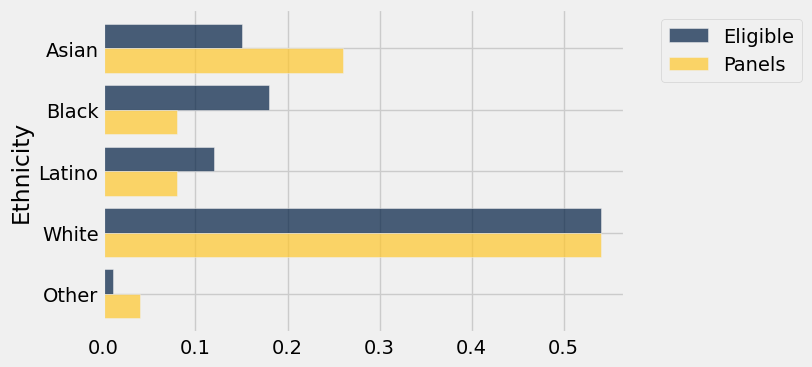

In [4]:
jury.barh('Ethnicity')

**Task:** Let's simulate under the assumption that the panel was selected randomly from the eligible population.
(There are 1423 people on the panel)

In [6]:
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
model # proportion of ethnic groups in alameda county

array([ 0.15,  0.18,  0.12,  0.54,  0.01])

**Task:** Let's 
- Add a single simulation to our table (as a new column)
- Visualize the eligible proportions, the panel proportions and the simulated proportions

In [7]:
simulated = sample_proportions(1423, model)
simulated

array([ 0.13773717,  0.17006325,  0.12789881,  0.55305692,  0.01124385])

## Distance Between Distributions
In the last lecture, the difference between observed black/purple
and their expected values (26%/75%) was our statistic.

In this case, we need to understand how each of the 5 categories
differ from their expected values according to the model.

**Question**: How could we do this? How about the differences?

In [8]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.137737
Black,0.18,0.08,0.170063
Latino,0.12,0.08,0.127899
White,0.54,0.54,0.553057
Other,0.01,0.04,0.0112439


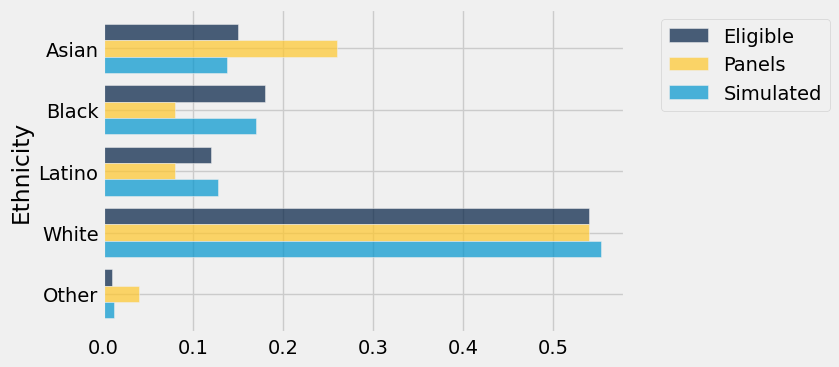

In [9]:
jury_with_simulated.barh('Ethnicity')

In [10]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


---
back to slides

---
## Total Variation Distance

In [13]:
def tvd(dist1, dist2):
    return sum(abs(dist1-dist2))/2

In [14]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [15]:
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.013106113843991574

---
back to slides

---